# Audio Machine Learning
## Worksheet - Linear Regression and Gradient Descent
-----

### Overview

In this worksheet you’ll fit a linear regression model to room acoustics data using gradient descent. You’ll work with the dataset RoomT60s.csv, where:

- Feature (input): Room Volume
- Target (label): Room reverberation time T60s

### Goal

By the end of this worksheet, you should be able to:

- Load a dataset from a CSV file and separate features and targets
- Apply the Linear Model to data using NumPy
- Measure model performance using a loss function (MSE, optionally MAE)
- Implement batch gradient descent to learn $\theta$ by minimising MSE
- Visualise results: data + fitted line, and loss vs training iteration


# 0 - Setup

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import ALL the libraries we will use python -m pip install numpy pandas

In [8]:
# Define some functions for later use

def MSE_loss(y_, y_hat_):
    assert y_.shape == y_hat_.shape, f'y and y_hat shapes should be equal, but y.shape = {y.shape} and y_hat.shape = {y_hat.shape}'
    return np.mean((y_ - y_hat_)**2)

def MAE_loss(y_, y_hat_):
    assert y_.shape == y_hat_.shape, f'y and y_hat shapes should be equal, but y.shape = {y.shape} and y_hat.shape = {y_hat.shape}'
    return np.mean(np.abs(y_ - y_hat_))

# 1 - Working with Data using Pandas 

We’ll start by generating a small synthetic dataset.  
Later, you’ll load a dataset from a CSV file.

In [9]:
# Create synthetic dataset
np.random.seed(42)
x = np.linspace(0, 10, 50) # Create our input variable, x
y = 2.5 * x + 1.0 + np.random.normal(0, 2, size=len(x)) # Create our target variable, y

# Put into a pandas DataFrame
df = pd.DataFrame({"Input Variable": x, "Target Variable": y})
df.head()

,Input Variable,Target Variable
0,0.000000,1.993428
1,0.204082,1.233675
2,0.408163,3.315785
3,0.612245,5.576672
4,0.816327,2.572510


The Pandas DataFrame is a convinient Python object for working with tabular data.
`df.head()` displays the first five entries in the Dataframe.

### 1.1 Splitting Features and Target

We’ll separate the input (`input variable`) from the target (`target variable`).  
Scikit-learn expects the input variables (or, *features*) to be in **2D array** form.

In [10]:
x_values = df[["Input Variable"]]   # double brackets -> keeps 2D shape
y_values = df["Target Variable"]     # single bracket -> 1D Series

In [11]:
x_values.shape

(50, 1)

---
### ✏️✏️ Exercise ✏️✏️
---

This created two smaller DataFrames, `x_values` and `y_values`. 
You can access the values as a NumPy array, using the `.values` attribute.

Use the `.values` attribute to determine:
- How many data entries are there for x and for y?
- What is the number of dimensions in the `x_values` array?
- What is the number of dimensions in the `y_values` array?

In [12]:
y_values.values.ndim

1

# 2 - Load + Inspect Data
The above code created a dataset using NumPy. Now we will load the dataset from a .csv file called 'RoomT60s.csv'

In [13]:
df = pd.read_csv("RoomT60s.csv")
display(df.head())
print(df.columns)
print("Rows:", len(df))

,Room Name,Length,Width,Height,a,Volume,T60s
0,small-Room001,8.33,9.15,2.38,0.75,181.402410,0.159187
1,small-Room002,1.01,2.70,2.43,0.36,6.626610,0.103687
2,small-Room003,4.83,3.70,2.82,0.59,50.396220,0.141937
3,small-Room004,2.99,3.53,4.33,0.45,45.701851,0.152062
4,small-Room005,7.94,9.17,3.05,0.43,222.069890,0.337687


Index(['Room Name', 'Length', 'Width', 'Height', 'a', 'Volume', 'T60s'], dtype='str')
Rows: 600


We can extract the 'features' and 'labels' from the above pandas Dataframe.

In [14]:
x_series = df["Volume"]    # (N)
y_series = df["T60s"]      # (N,)

x = x_series.values        # (N)
y = y_series.values        # (N,)

print("x:", x.shape, "ndim:", x.ndim)
print("y:", y.shape, "ndim:", y.ndim)


x: (600,) ndim: 1
y: (600,) ndim: 1


- Feature: Volume ($x$)
- Target: T60 ($y$)

# 3 - Plot Data + Initialise Model

---
### ✏️✏️ Exercise ✏️✏️
---

Plot the data. Compare to the jpg 'Vol_vs_T60.jpg' that was included with the Worksheet.

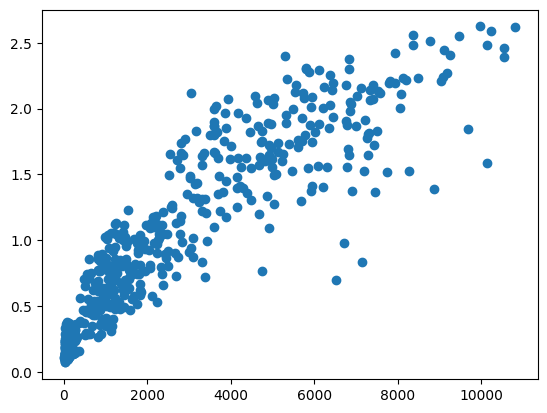

In [15]:
plt.scatter(x,y)

----
### 3.1 - Apply the Linear Model 
Choose initial values for the linear model parameters, $m$ and $c$.

The model is defined as:
    
$$\hat{y} = mx + c$$

In [16]:
m = 0.0001 
c = 0.0
y_hat = m*x + c  #This applies the linear model

---
### ✏️✏️ Exercise ✏️✏️
---

Do the following:
- Create a new plot of the data, including the above linear model predictions.
- Confirm that the number of predicitions contained in `y_hat` equals the number of target values in `y`
- Find the Mean Absolute Error over the dataset
- Find the Mean Squared Error over the dataset

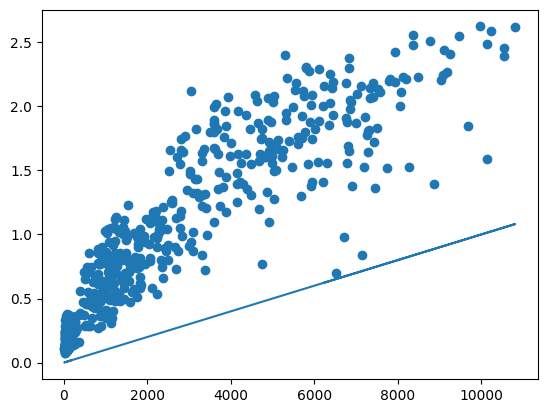

In [17]:
plt.plot(x,y_hat)
plt.scatter(x,y)

y_hat.size

model_diff = y_hat - y
model_diff_abs = abs(y_hat - y)


mae = np.mean(model_diff_abs)
mse = np.mean(model_diff**2)


# 4 - Visualise Loss Surface

We can visualise the loss surface, by plotting possible values of the parameters, $m$ and $c$, against the loss.

---
### ✏️✏️ Exercise ✏️✏️
---

Complete the code below, such that for each 'candidate value' of $m$, we have the correponding loss value over the full dataset. The result should be an array of values for the parameter $m$, and a corresponding array `losses`,  holding the resulting model predicition. so, for example:

`y_hat[0] = ms[0]*x + c`

and 

`y_hat[1] = ms[1]*x + c`

and so on.

Then, plot the resulting array of losses against the candidate values for m.

In [18]:
ms = np.linspace(-0.01, 0.01, 100) # Create a vector of 'candidate values' for m

# Create an empty list to hold the loss values
losses = []
square = []
for candidate_m in ms: # Iterate through the candidate values of m
    # print(candidate_m) # For information, comment this out!
    
    # 1 - Write code here applying the linear model to create the predictions, y_hat
    y_hat = candidate_m*x +c
    
    # 2 - Calculate the MSE loss for this set of predictions
    model_diff = y_hat - y
    square = np.square(model_diff)
    mse = np.mean(square)

    # 3 - Append the loss to the list 'losses'
    losses.append(mse)


----
The following code plots the result. It should like something like the jpg 'MSE_vs_m' included with the worksheet.

Text(0, 0.5, 'MSE Loss')

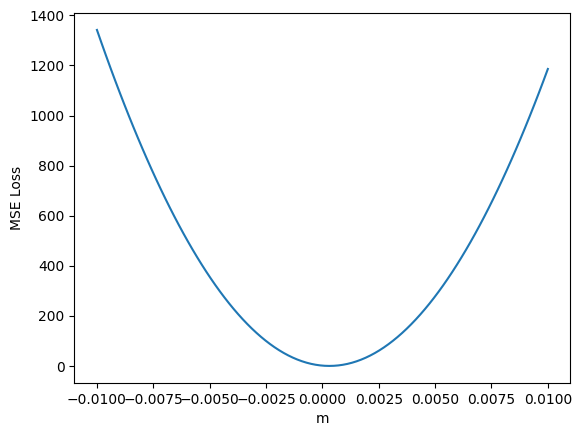

In [19]:
losses = np.array(losses)  # Create a NumPy array from the list of losses
plt.plot(ms, losses)       # Plot the candidate values for m against the losses
plt.xlabel('m')
plt.ylabel('MSE Loss')

From the plot, you can see the loss as a function of the model parameter $m$:
- In this case there is a **global minimum** of the loss with respect to the model parameter $m$.
- The value for $m$ which minimises the loss can seen on the graph, as the bottom of the 'bowl' shape.
- In gradient descent, we choose a starting point for the model parameters, then adjust them in the direction that causes the loss to decrease
- We do this by finding the **gradient** of the loss function with respect to the model parameters 

# 5 - Gradient Descent for a Single Training Example

We will start by finding the gradient of the loss with respect to the model parameters, $m$ and $c$, for a single training example $i$.

For one example $i$:

- **Prediction:**  
  $\hat{y}^{(i)} = m x^{(i)} + c$

- **Model Error:**  
  $r^{(i)} = y^{(i)} - \hat{y}^{(i)}$

- **Per-example squared loss:**  
  $\ell^{(i)} = (y^{(i)} - (mx^{(i)} + c))^2$

Gradients of the loss with respect to the parameters, for the example $i$:


$$\frac{\partial \ell^{(i)}}{\partial m} = -2 r^{(i)} x^{(i)}$$

$$\frac{\partial \ell^{(i)}}{\partial c} = -2 r^{(i)}$$


The below function takes a single training example from the dataset, as well as model parameters $m$ and $c$, and returns the gradient of the loss with respect to the model parameters:

In [20]:
def per_example_grads(x_i_, y_i_, m_, c_):
    # Check only a single example has been passed into the function
    assert y_i_.size == 1, 'y_i_ has multiple elements, this function is for single example only'
    # Apply linear model, and find error
    y_hat_i = m_*x_i_ + c_
    r_i = y_i_ - y_hat_i
    # Find gradient of error wrt to parameters m and c
    dli_dm = -2 * r_i * x_i_
    dli_dc = -2 * r_i
    return dli_dm, dli_dc

### 5.1 - Loss and Gradient Calculation
We can calculate the squared error for a single example, then find the gradient of the loss wrt to each model parameter using the `per_example_grads` function:

In [21]:
# Start with candidate model parameters
m = 0.0
c = 0.0

# Use the first training example from the dataset
i = 0

# Apply the linear model and find the squared error, sq
y_hat_i = m*x[i] + c
sq = (y[i] - y_hat_i)**2
print(f'Model parameters: m = {m}, c = {c}')
print(f'Squared error for example i = {i}: {sq}')

Model parameters: m = 0.0, c = 0.0
Squared error for example i = 0: 0.02534066015624997


In [22]:
# Get the gradient of the loss with respect to m and c 
grads = per_example_grads(x[i], y[i], m, c)
print(f'dli_dm = {grads[0]}, dli_dc = {grads[1]}')

dli_dm = -57.753992283749966, dli_dc = -0.3183749999999998


A positive gradient indicates that increasing the parameter value will increase the loss. Likewise, a negative gradient indicates that increasing the parameter value will decrease the loss. 

When carrying out gradient descent, we adjust the parameters in the opposite direction to the gradient. You can think of this as 'rolling down the slope' shown in the 'MSE_vs_m.jpg' plot from earlier. 

### 5.2 - Gradient Descent Step

Let's take a single step of gradient descent, for our single example, $i$:

$m:= m - \alpha \frac{\partial \ell^{(i)}}{\partial m}$

$c:= c - \alpha \frac{\partial \ell^{(i)}}{\partial c}$

In [23]:
# Set the learning rate alpha
alpha = 0.00000001
assert alpha > 0

In [24]:
print(f'Initial model parameters: m = {m}, c = {c}')
print(f'Squared error for example i = {i}: {sq}')

grads = per_example_grads(x[i], y[i], m, c)
m = m - alpha*grads[0]
c = c - alpha*grads[1]
y_hat_i = m*x[i] + c
sq = (y[i] - y_hat_i)**2

print(f'Upated model parameters: m = {m}, c = {c}')
print(f'Updated squared error for example i = {i}: {sq}')

Initial model parameters: m = 0.0, c = 0.0
Squared error for example i = 0: 0.02534066015624997
Upated model parameters: m = 5.775399228374996e-07, c = 3.1837499999999982e-09
Updated squared error for example i = 0: 0.025307314883195903


The squared error after updating the parameters should be smaller.

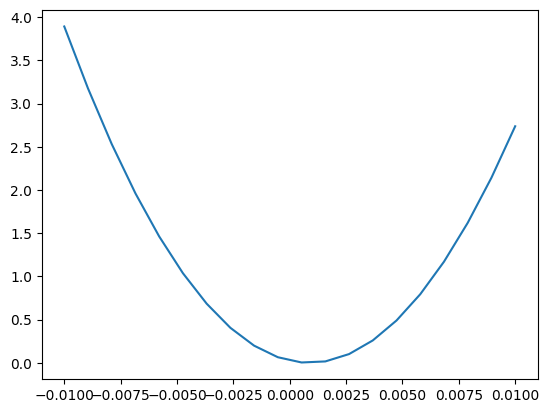

In [25]:
ms = np.linspace(-0.01, 0.01, 20) # Create a vector of 'candidate values' for m
losses = [] # Create a list to hold the predictions

for candidate_m in ms: # This is a 'for loop', it iterates through the items in 'ms'
    
    # Write code here, so that for every 'candidate_m', the model is applied to the example x[i] 
    # to find the model prediciton.

    y_hat_i = candidate_m*x[i] + c
    sq = (y[i] - y_hat_i)**2
    
    # Use the .append() function to append the loss to the list of losses
    
    losses.append(sq)

    
# This creates the array of losses
losses = np.array(losses)


# Now plot the losses against the candidate_m values
#Your Code Here!

plt.plot(ms,losses)

The resulting plot should look something like the file 'MSE_vs_m.jpg' included with this worksheet. When we carry out gradient descent, we are trying to find the parameter values correponding to the bottom of bowl-like shape shown in the plot.

# 6 - Gradient Descent for Full Dataset

Batch gradients are the mean of per-example gradients:


$$\frac{\partial L}{\partial m}
= \frac{1}{N} \sum_{i=1}^{N} \frac{\partial \ell^{(i)}}{\partial m}$$

$$\frac{\partial L}{\partial c}
= \frac{1}{N} \sum_{i=1}^{N} \frac{\partial \ell^{(i)}}{\partial c}$$



The function `batch_grads_mean` finds the mean gradient over a batch of training examples.

In [26]:
def batch_grads_mean(x_, y_, m_, c_):
    # Create lists to hold gradients for each example
    grads_m = []
    grads_c = []
    # Iterate over each example
    for x_i, y_i in zip(x_, y_):
        dli_dm, dli_dc = per_example_grads(x_i, y_i, m_, c_)
        grads_m.append(dli_dm)
        grads_c.append(dli_dc)
    # Find mean gradient over batch
    dL_dm = np.mean(grads_m)
    dL_dc = np.mean(grads_c)
    return dL_dm, dL_dc

## 6.1 - A Step of Gradient Descent

Let's take a single step of gradient descent, for our complete dataset:

$$m:= m - \alpha \frac{\partial L}{\partial m}$$

$$c:= c - \alpha \frac{\partial L}{\partial c}$$

In [27]:
# Set the learning rate alpha
alpha = 0.00000001
# Reset the model parameters
m, c = 0, 0

y_hat_before = m*x + c
loss_before = MSE_loss(y, y_hat_before)

dL_dm, dL_dc = batch_grads_mean(x, y, m, c)
m_new = m - alpha*dL_dm
c_new = c - alpha*dL_dc

y_hat_after = m_new*x + c_new
loss_after = MSE_loss(y, y_hat_after)

print(f'Loss before update: {loss_before}')
print(f'Loss_after update: {loss_after}')
print(f'Parameters after update: m = {m_new}, c = {c_new}')

Loss before update: 1.3434210875390624
Loss_after update: 0.8123770788657906
Parameters after update: m = 7.796120865920445e-05, c = 1.8337450000000002e-08


## 6.2 - Plotting the Result

We can visualise the model before and after the parameter update, as follows:

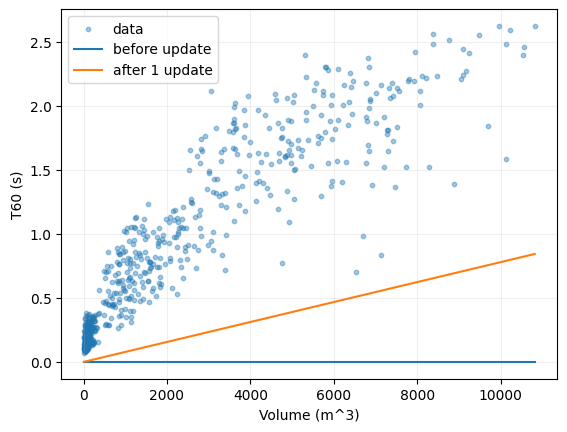

In [28]:
plt.scatter(x, y, s=10, alpha=0.4, label="data")

xx = np.linspace(x.min(), x.max(), 200)
plt.plot(xx, m*xx + c, label="before update")
plt.plot(xx, m_new*xx + c_new, label="after 1 update")

plt.xlabel("Volume (m^3)")
plt.ylabel("T60 (s)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

# 🎯🎯 Challenge! 🎯🎯

The above code implements a single step of batch gradient descent for the linear model. 

Your task now is to turn that into a full training loop, that repeats gradient descent for many iterations.

---

### Step-by-step instructions

1. Choose hyperparameters and initial values
   - Use the learning rate `alpha` defined earlier, and choose the number of training `iterations`
   - Initialise the model parameters:
     - m = 0.0
     - c = 0.0
2. Create history lists to monitor model learning
   - Make empty lists to monitor the values of the loss, `m` and `c`
     - `loss_history`
     - `m_history`
     - `c_history`
   - These will store values at each iteration
3. Write the training loop
   - This is a `for-loop` that runs for `iterations` steps.
   - Each iteration should:
     - *Forward pass*: compute predicitions `y_hat` for all examples
       - `y_hat = mx + c`
     - *Compute Loss*: compute the MSE for the dataset and append to `loss_history`
     - *Store Parameters*: append the current values of `m` and `c` to `m_history` and `c_history`
     - *Compute Gradients*: use the `batch_grads_mean` function to find the gradients of the loss with respect to the parameters `m` and `c`
     - *Update Parameters*: perform gradient descent as in section 6.1
     - *Print Progress* (optional): every 50 iterations, print the loss, and the parameters, so you can monitor model training progress
4. Check Results
   - After training create plots of:
     - The loss vs training iteration number
     - The model prediction line at the start and end of training, along with a scatter plot of the training data
   - The loss should generally be decreasing with each iteration
   - The final model line should look like a reasonable fit when plotted over the training data
   - If your loss becomes `nan` (not a number), or explodes/becomes unstable, try:
     - reducing learning rate `alpha`
     - scale `x` to be smaller

Below is a code template to get you started:

In [29]:
# Find the ranges of the inout and output
x_range = max(x) - min(x)
y_range = max(y) - min(y)

iterations = 1000     # TODO (e.g. 200 or 500)
iter_array = np.linspace(1,iterations,iterations)

# Hyperparameters
alpha_m = 1/(5000*x_range)       # TODO (e.g. 0.000000001)
alpha_c = 1/(5000*y_range)

# Initial parameters
m, c = 0, 0.5   # TODO

# Lists for monitoring training
# TODO - create empty lists for monitoring m, c and loss over each iteration
loss_history = []
m_history = []
c_history = []

# Matrix



# Iterate
for it in range(iterations):

    # 1) Forward pass (predictions)
    y_hat_before = m * x + c  # TODO: vector of predictions for all x, using the current values of m and c

    # 2) Calculate Loss
    loss = MSE_loss(y, y_hat_before) # TODO: Find the loss
    loss_history.append(loss) # TODO: append the loss to the loss_history list

    # 3) Record parameters
    # TODO: Append the parameters m and c to the m_history and c_history lists
    m_history.append(m)
    c_history.append(c)

    # 4) Get gradients (mean of per-example gradients)
    #dm, dc = ...  # TODO: call the batch gradient function
    dL_dm, dL_dc = batch_grads_mean(x,y,m,c)

    # 5) Parameter update (gradient descent step)
    #m = ...       # TODO: update m using alpha and dm
    #c = ...       # TODO: update c using alpha and dc
    m = m - alpha_m*dL_dm
    c = c - alpha_c*dL_dc

    # 6) Optional debug printing
    if it % 50 == 0:
        print(f"Iteration: {it}")
        print(f"Current m is {m}")
        print(f"Current c is {c}")
        print(f"Current loss is {loss}")

print("Final parameters:", m, c)
print("Final loss:", loss_history[-1])


Iteration: 0
Current m is 9.99782729463881e-05
Current c is 0.5000653581244947
Current loss is 0.6765485875390624
Iteration: 50
Current m is 0.0002140053585133325
Current c is 0.49941158753713477
Current loss is 0.09867890245277336
Iteration: 100
Current m is 0.00021414606214789468
Current c is 0.49866953285802895
Current loss is 0.09853837601278351
Iteration: 150
Current m is 0.00021428616473127794
Current c is 0.4979306480532436
Current loss is 0.09839904759697521
Iteration: 200
Current m is 0.00021442566883102677
Current c is 0.4971949195818583
Current loss is 0.09826090699188297
Iteration: 250
Current m is 0.0002145645770037155
Current c is 0.4964623339607963
Current loss is 0.09812394407111383
Iteration: 300
Current m is 0.00021470289179499727
Current c is 0.4957328777645774
Current loss is 0.09798814879460485
Iteration: 350
Current m is 0.00021484061573965102
Current c is 0.49500653762507135
Current loss is 0.09785351120788723
Iteration: 400
Current m is 0.0002149777513616275
Cur

In [30]:
print(alpha_m)

1.8507089403766925e-08


Now create the plots described earlier.

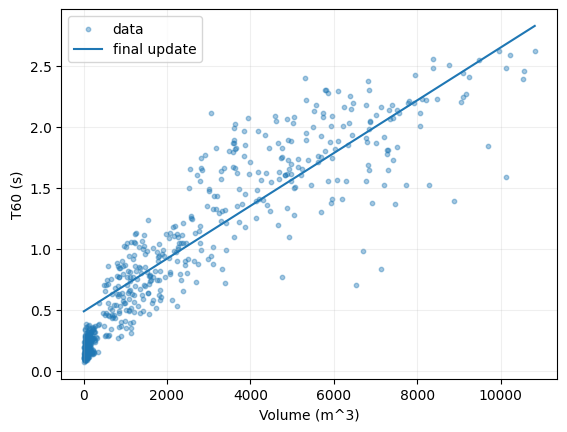

In [31]:
plt.scatter(x, y, s=10, alpha=0.4, label="data")

xx = np.linspace(x.min(), x.max(), 200)
plt.plot(xx, m*xx + c, label="final update")

plt.xlabel("Volume (m^3)")
plt.ylabel("T60 (s)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

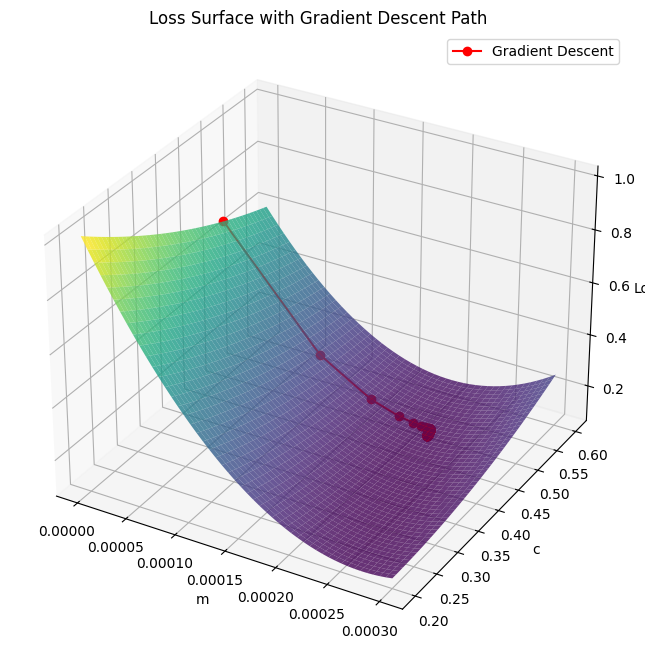

In [32]:
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

m_vals = np.linspace(0, 0.0003, 50)  # 50 values of m
c_vals = np.linspace(0.2, 0.6, 50)  # 50 values of c

M, C = np.meshgrid(m_vals, c_vals)  # Create a grid

def MSE_loss(y, y_hat):
    return np.mean((y - y_hat) ** 2)

# Create empty array for losses
Loss = np.zeros_like(M)

# Loop over all combinations of m and c
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_hat = M[i, j] * x + C[i, j]  # predictions
        Loss[i, j] = MSE_loss(y, y_hat)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Mesh plot
ax.plot_surface(M, C, Loss, cmap='viridis', alpha=0.8)

# Optional: overlay gradient descent path
ax.plot(m_history, c_history, loss_history, color='red', marker='o', label='Gradient Descent')

# Labels
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('Loss')
ax.set_title('Loss Surface with Gradient Descent Path')
ax.legend()

plt.show()






In [33]:
iter_array.size
loss.size

1

## Matrix

In [ ]:
# Find the ranges of the inout and output
x_range = max(x) - min(x)
y_range = max(y) - min(y)

iterations = 1000     # TODO (e.g. 200 or 500)
iter_array = np.linspace(1,iterations,iterations)

# Hyperparameters
alpha_m = 1/(5000*x_range)       # TODO (e.g. 0.000000001)
alpha_c = 1/(5000*y_range)

# Initial parameters
theta_0, theta_1 = 0.5, 0   # TODO


iterations = 1000

y_m = np.array([y]).T

x_0 = np.ones(len(x))
x_1 = np.array(x)

x_m = np.vstack([x_0,x_1]).T
p_vec = np.array([[theta_0],[theta_1]])

loss_history = np.zeros(iterations)
p_vec_history = np.zeros([np.size(p_vec),iterations])



# Iterate
for it in range(iterations):

    # 1) Forward pass (predictions)
    y_hat = np.matmul(x_m,p_vec) # TODO: vector of predictions for all x, using the current values of m and c

    # 2) Calculate Loss
    loss = np.mean((y_m - y_hat)**2) # TODO: Find the loss
    loss_history[it] = loss # TODO: append the loss to the loss_history list

    # 3) Record parameters
    p_vec_history[:,it]  = p_vec.flatten()

    # Calculate the gradient
    dL_dm = -2 * loss * x_m
    dL_dc = -2 * loss

    # 5) Parameter update (gradient descent step)
    p_vec[0] = p_vec[0] - alpha_c* np.mean(dL_dc)
    p_vec[1] = p_vec[1] - alpha_m*  np.mean(dL_dm)

    # 6) Optional debug printing
    if it % 50 == 0:
        print(f"Iteration: {it}")
        print(f"Current m is {m}")
        print(f"Current c is {c}")
        print(f"Current loss is {loss}")

print("Final parameters:", m, c)
print("Final loss:", loss_history[-1])



Iteration: 0
Current m is 0.00021657579388157237
Current c is 0.4858554089898889
Current loss is 0.6765485875390624
Iteration: 50
Current m is 0.00021657579388157237
Current c is 0.4858554089898889
Current loss is 1.2839430663010418
Iteration: 100
Current m is 0.00021657579388157237
Current c is 0.4858554089898889
Current loss is inf
Iteration: 150
Current m is 0.00021657579388157237
Current c is 0.4858554089898889
Current loss is inf
Iteration: 200
Current m is 0.00021657579388157237
Current c is 0.4858554089898889
Current loss is inf
Iteration: 250
Current m is 0.00021657579388157237
Current c is 0.4858554089898889
Current loss is inf
Iteration: 300
Current m is 0.00021657579388157237
Current c is 0.4858554089898889
Current loss is inf
Iteration: 350
Current m is 0.00021657579388157237
Current c is 0.4858554089898889
Current loss is inf
Iteration: 400
Current m is 0.00021657579388157237
Current c is 0.4858554089898889
Current loss is inf
Iteration: 450
Current m is 0.0002165757938815

C:\Users\Liam Holland\AppData\Local\Temp\ipykernel_27512\1211612823.py:63: RuntimeWarning: overflow encountered in square
  loss = np.mean((y_m - y_hat)**2) # TODO: Find the loss


In [46]:
y_m.shape

(600, 1)

In [40]:
loss

np.float64(0.09620419441010811)

## Further Work

If you wish to go further, here are some ideas for things you can try (in no particular order!):

- Implement Stochastic Gradient Descent (SGD): Update `m` and `c` using one training example at a time (optionally shuffle the data each epoch). Compare the loss curve to batch Gradient Descent (An epoch = one full pass through the dataset).
  
- Implement Mini-Batch Stochastic Gradient Descent: Update `m` and `c` using a small batch of randomly selected training examples at a time (e.g. batch size 8, 16, or 32).

- Experiment with the learning rate `alpha`: Try values that are smaller/larger and describe what you observe (slow convergence, oscillation, divergence). Find a “good” range for your data. In practice, you would usually scale the features `x` first (e.g. min–max scale to [-1, 1], or standardise to zero mean and unit variance). Try this and see how it changes the suitable range of alpha.

- Rewrite the model in matrix form: In the lecture slides, we applied the model using matrix multiplication, which makes it easier to add additional features. Rewrite the model so predictions are computed as $\hat{y} = X\theta$ (you will need to add a bias column of ones to X). Use the '@' operator for matrix multiplication. Confirm this implementation of the model gives the same results as the `y_hat = mx + c` version used in this worksheet.

- Add a second feature: Try adding a second feature to the model, you can use 'absorption' from the RoomT60s.csv dataset, for example. This will mean there are now three parameters in the model: $$\hat{y} = \theta_0 * Volume + \theta_1 * absorption + \theta_2$$ Compare the performance of this with the single-feature model.

- Vectorise the gradient using broadcasting (no Python loop): The `batch_grads_mean` function currently uses a for-loop to find the mean of the gradients over the dataset, which is inefficient. Compute all per-example errors at once, then take means to get dm and dc. Check correctness by comparing your vectorised gradients to the for-loop version of the gradients (e.g. using `np.allclose`).